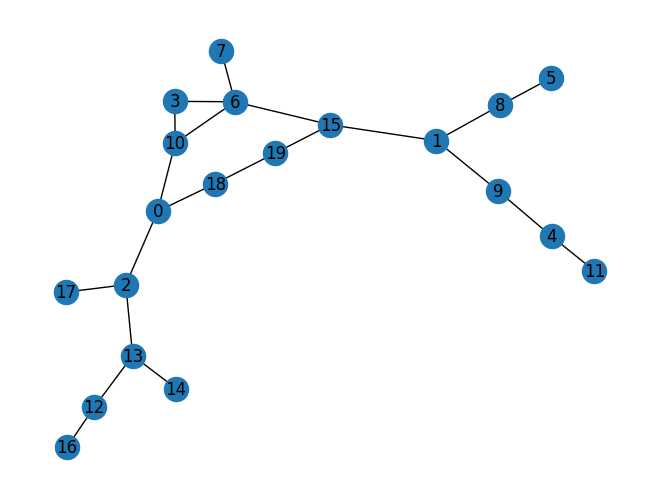

In [1]:
# Spring布局
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(20, 0.1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

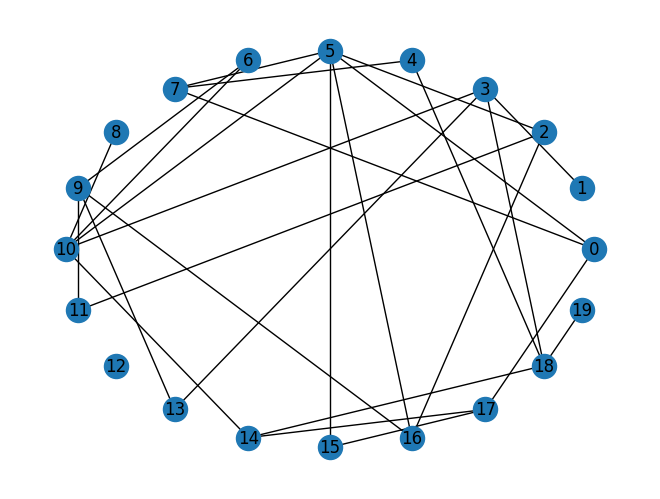

In [2]:
# 圆形布局
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(20, 0.1)
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

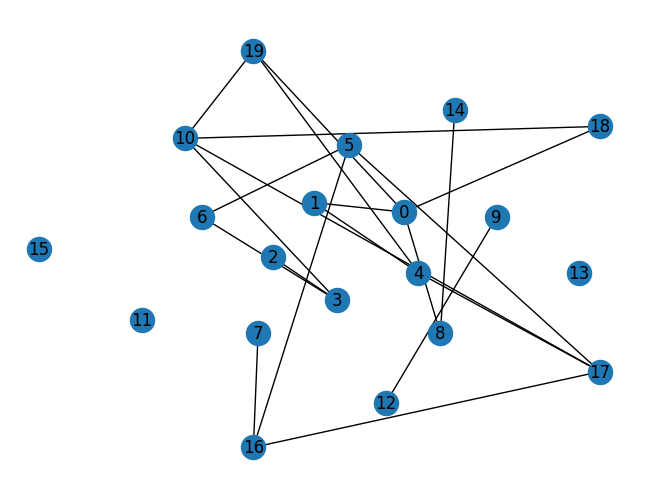

In [3]:
# 嵌套布局
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(20, 0.1)
pos = nx.shell_layout(G, nlist=[range(5), range(5,10), range(10,15), range(15,20)])
nx.draw(G, pos, with_labels=True)
plt.show()

/var/folders/x4/r_0mlptx5gv0_c3dnm54s9880000gn/T/ipykernel_98992/2314664043.py:9: DeprecationWarning: nx.nx_pydot.pydot_layout depends on the pydot package, which has known issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.pydot_layout(G, prog='dot')


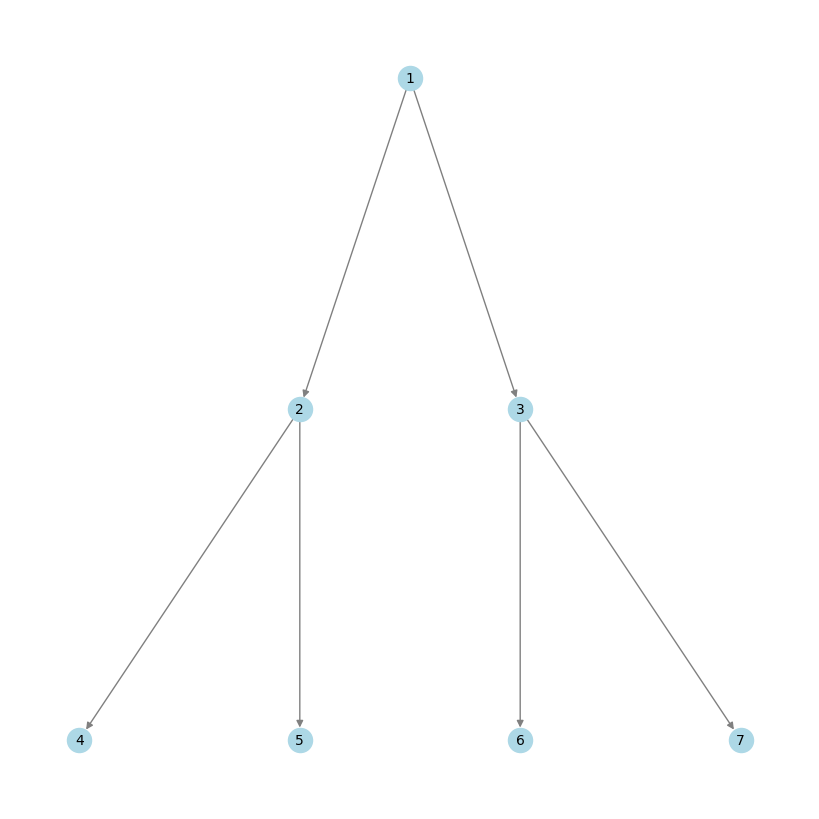

In [17]:
# 层次布局
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个 DAG
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])

# 应用层次布局
pos = nx.nx_pydot.pydot_layout(G, prog='dot')

# 绘制图形
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
plt.show()

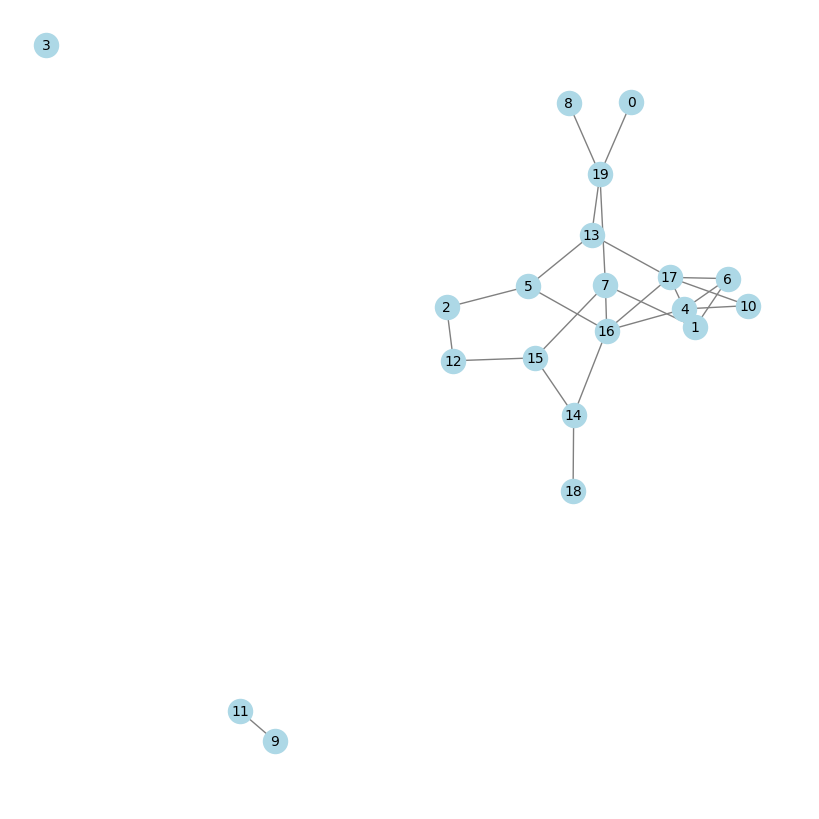

In [10]:
# 力导向布局
import networkx as nx
import matplotlib.pyplot as plt

# 创建一个无向图
G = nx.erdos_renyi_graph(20, 0.1)

# 应用力导向布局
pos = nx.spring_layout(G, seed=42)

# 绘制图形
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10)
plt.show()

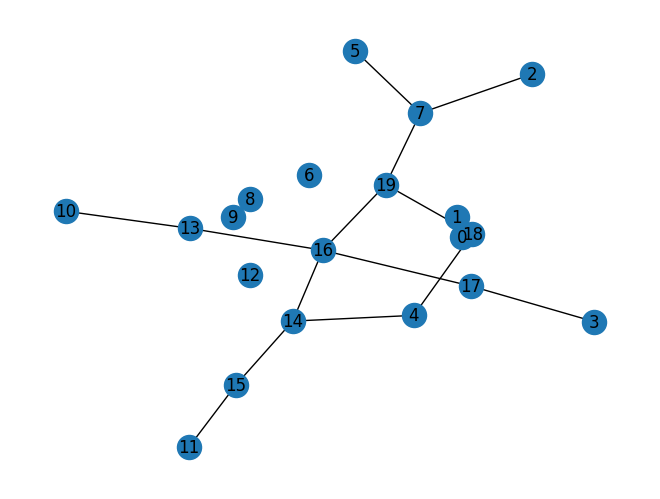

In [7]:
# 嵌入式布局
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(20, 0.1)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

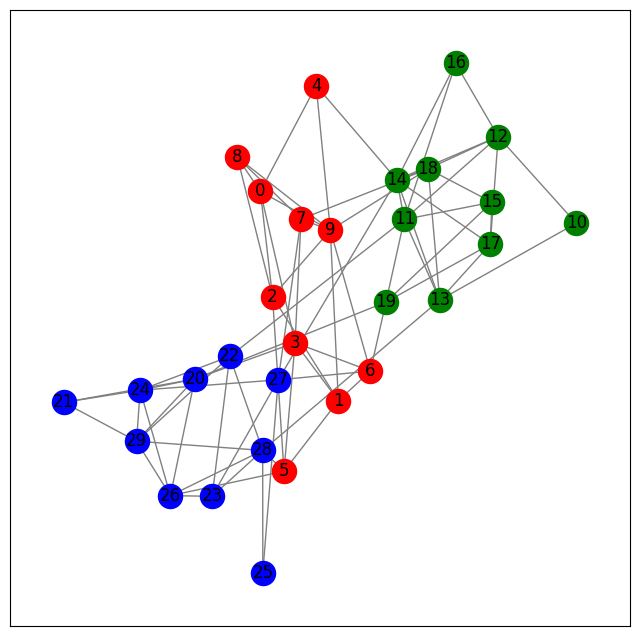

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities

# 创建一个有社区结构的无向图
G = nx.random_partition_graph([10, 10, 10], 0.5, 0.05, seed=42)

# 应用簇布局
communities = list(label_propagation_communities(G))
pos = nx.spring_layout(G)

# 绘制图形
plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b']
for i, com in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, [node for node in com], node_color=colors[i])
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos)
plt.show()

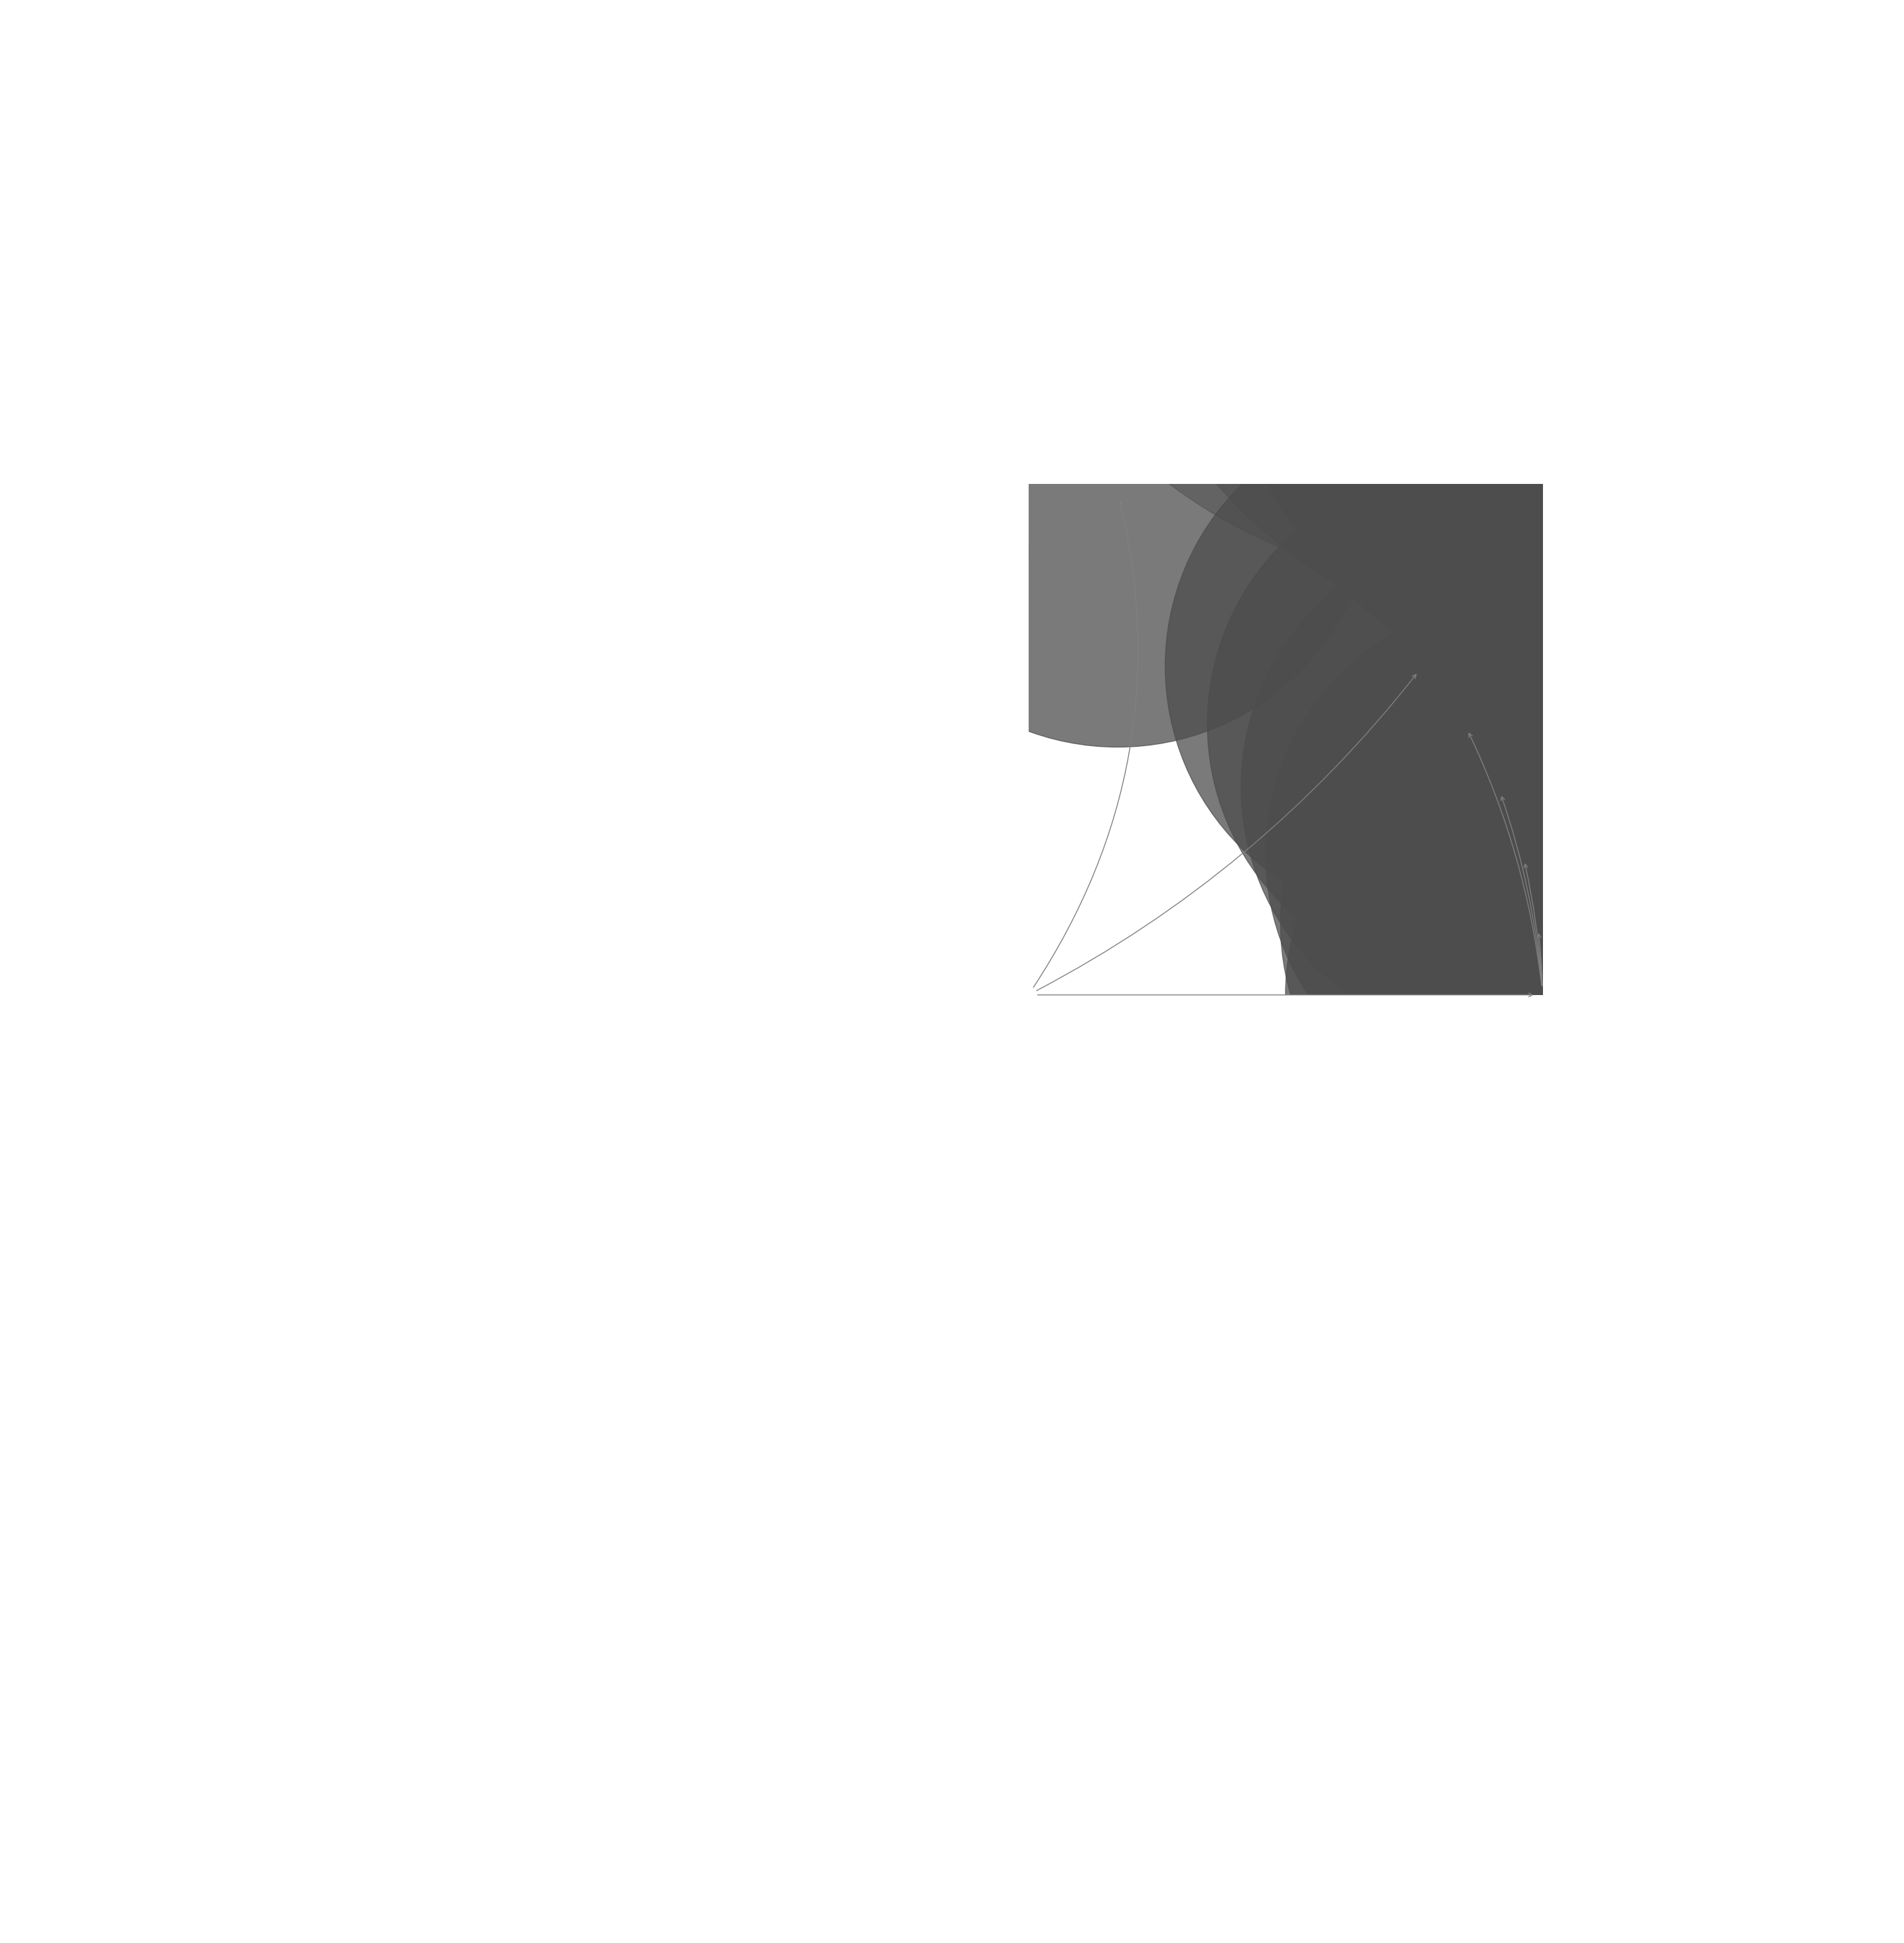

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch, Circle
from matplotlib.collections import PatchCollection

# 创建一个有向无环图(DAG)
G = nx.DiGraph()
for i in range(1, 31):
    G.add_node(i)
G.add_edges_from([(1, i) for i in range(2, 11)])
G.add_edges_from([(2, i) for i in range(11, 16)])
G.add_edges_from([(3, i) for i in range(16, 21)])
G.add_edges_from([(4, i) for i in range(21, 26)])
G.add_edges_from([(5, i) for i in range(26, 31)])

# 定义蒲公英布局的函数
def dandelion_layout(G, scale=1, seed=None):
    pos = {}
    nx.set_node_attributes(G, 0, 'angle')
    nx.set_node_attributes(G, 0, 'radius')

    # 计算中心节点的位置
    pos[1] = (0, 0)
    G.nodes[1]['angle'] = 0
    G.nodes[1]['radius'] = 0

    # 计算其他节点的位置
    theta = 2 * np.pi / 9
    radius = 1
    for i in range(2, 11):
        angle = (i - 2) * theta
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        pos[i] = (x, y)
        G.nodes[i]['angle'] = angle
        G.nodes[i]['radius'] = radius

    # 计算叶子节点的位置
    for i in range(11, 31):
        parent = (i - 10) // 5 + 1
        angle = G.nodes[parent]['angle'] + (i - 10 - 1 * ((i - 10) // 5)) * theta / 5
        radius = G.nodes[parent]['radius'] + 1
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        pos[i] = (x, y)
        G.nodes[i]['angle'] = angle
        G.nodes[i]['radius'] = radius

    return pos

# 绘制图形
pos = dandelion_layout(G, scale=2)
plt.figure(figsize=(10, 10))

# 绘制节点
patches = []
for node in G.nodes():
    x, y = pos[node]
    radius = G.nodes[node]['radius'] * 0.5
    circle = Circle((x, y), radius, fill=True, color=(0.3, 0.3, 0.3, 1 - radius / 2))
    patches.append(circle)
node_collection = PatchCollection(patches, match_original=True)
plt.gca().add_collection(node_collection)

# 绘制边
for (u, v) in G.edges():
    ux, uy = pos[u]
    vx, vy = pos[v]
    angle1 = G.nodes[u]['angle']
    angle2 = G.nodes[v]['angle']
    con = ConnectionPatch(xyA=(ux, uy), xyB=(vx, vy),
                         coordsA="data", coordsB="data",
                         arrowstyle='->', shrinkA=10, shrinkB=10,
                         connectionstyle=f'arc3,rad={abs(angle2-angle1)*0.5/np.pi}',
                         color='gray')
    plt.gca().add_artist(con)

plt.axis('off')
plt.show()

In [13]:
import pandas as pd
import os

# 读取两个CSV文件
binary_category = pd.read_csv('../Desktop/Paula_s_Choice/binary_category.csv')

# 清洗binary_category数据
binary_category['category'] = binary_category['category'].str.replace('Categories: ', '', regex=False).str.strip()
binary_category['ingredient_name'] = binary_category['ingredient_name'].str.strip()

# 保存处理后的binary_category.csv
binary_category.to_csv('../Desktop/Paula_s_Choice/binary_category.csv', index=False)

In [8]:
import pandas as pd
from collections import Counter

# 读取两个CSV文件
binary_cosmetic_ingredient = pd.read_csv('../Desktop/DBCosmetic/binary_cosmetic_ingredient.csv')
binary_category = pd.read_csv('../Desktop/Paula_s_Choice/binary_category.csv')

# 找出category为Emulsifier的Ingredient
emulsifier_ingredients = binary_category[binary_category['category'] == 'Emulsifier']['ingredient_name'].tolist()

# 统计Emulsifier类型Ingredient在Cosmetic中的使用情况
ingredient_counts = Counter(binary_cosmetic_ingredient[binary_cosmetic_ingredient['ingredient'].isin(emulsifier_ingredients)]['ingredient'])

# 输出结果
for ingredient, count in ingredient_counts.most_common():
    print(f"{ingredient} - {count}")

Xanthan Gum - 687
Hydrogenated Lecithin - 412
Glyceryl Stearate - 357
Polysorbate 20 - 215
Cetyl Alcohol - 211
Stearic Acid - 200
Sorbitan Isostearate - 185
Polysorbate 60 - 165
PEG-100 Stearate - 159
Glyceryl Caprylate - 147
Sorbitan Olivate - 128
Cetearyl Olivate - 120
Isohexadecane - 109
Sodium Stearoyl Glutamate - 106
Palmitic Acid - 104
Stearyl Alcohol - 97
Cetearyl Glucoside - 95
Glyceryl Stearate SE - 92
Potassium Cetyl Phosphate - 82
Polysorbate 80 - 78
Sorbitan Stearate - 62
Sorbitan Oleate - 60
PEG - 59
Glyceryl Stearate Citrate - 56
Acacia Senegal Gum - 53
Lauryl PEG-9 Polydimethylsiloxyethyl Dimethicone - 50
Polyglyceryl-3 Diisostearate - 50
Glycereth-26 - 47
Sodium Lauroyl Lactylate - 44
Polyglyceryl-10 Laurate - 42
Arachidyl Glucoside - 41
Polyglyceryl-3 Polyricinoleate - 39
Hydrogenated Castor Oil - 30
Steareth-21 - 30
Glyceryl Oleate - 28
Polyglyceryl-10 Dioleate - 27
PPG-26-Buteth-26 - 25
Polyglyceryl-10 Stearate - 23
Sodium Stearoyl Lactylate - 23
Isoamyl Laurate - 23

In [14]:
import pandas as pd
from collections import Counter
import os

# 读取两个CSV文件
binary_cosmetic_ingredient = pd.read_csv('../Desktop/DBCosmetic/binary_cosmetic_ingredient.csv')
binary_category = pd.read_csv('../Desktop/Paula_s_Choice/binary_category.csv')

# 获取binary_category['category']中的所有唯一值
all_categories = binary_category['category'].unique()

# 创建保存结果的目录
save_dir = '../Desktop/Paula_s_Choice/categories430/'
os.makedirs(save_dir, exist_ok=True)

# 为每种类型统计Ingredient出现次数
for category in all_categories:
    category_ingredients = binary_category[binary_category['category'] == category]['ingredient_name']
    ingredient_counts = Counter(binary_cosmetic_ingredient[binary_cosmetic_ingredient['ingredient'].isin(category_ingredients)]['ingredient'])
    
    # 创建结果数据框
    result_df = pd.DataFrame({'ingredient': list(ingredient_counts.keys()), 'count': list(ingredient_counts.values())})
    result_df = result_df.sort_values('count', ascending=False)
    
    # 保存结果为CSV文件
    category_filename = category.lower().replace('/', '_').replace(' ', '_') + '.csv'
    result_df.to_csv(os.path.join(save_dir, category_filename), index=False)
    print(f"Saved results for category: {category}")

Saved results for category: Antioxidant
Saved results for category: Plant Extracts
Saved results for category: Peptides
Saved results for category: Humectant
Saved results for category: Chelating Agent
Saved results for category: Emollient
Saved results for category: Exfoliant
Saved results for category: Texture Enhancer
Saved results for category: Prebiotic/Probiotic/Postbiotic
Saved results for category: pH Adjuster/Stabilizer
Saved results for category: Coloring Agent/Pigment
Saved results for category: UV Filters
Saved results for category: Antibacterial
Saved results for category: Emulsifier
Saved results for category: Cleansing Agent
Saved results for category: Occlusive/Opacifying Agent
Saved results for category: Solvent
Saved results for category: Silicone
Saved results for category: Film-Forming Agent
Saved results for category: Polymer
Saved results for category: Preservative
Saved results for category: Suspending/Dispersing Agent
Saved results for category: Retinoids
Saved 

In [23]:
import pandas as pd
from collections import Counter

# 读取binary_benefit.csv文件
binary_benefit = pd.read_csv('../Desktop/Paula_s_Choice/binary_benefit.csv')

# 找出'Evens Skin Tone'的ingredient_name
evens_skin_tone_ingredients = binary_benefit[binary_benefit['benefit'] == 'Evens Skin Tone']['ingredient_name'].tolist()

# 找出'Dark Spot Fading'的ingredient_name
dark_spot_fading_ingredients = binary_benefit[binary_benefit['benefit'] == 'Dark Spot Fading']['ingredient_name'].tolist()

# 计算'Evens Skin Tone'的ingredient_name也有'Dark Spot Fading'的比例
evens_skin_tone_with_dark_spot = len(set(evens_skin_tone_ingredients) & set(dark_spot_fading_ingredients))
evens_skin_tone_total = len(evens_skin_tone_ingredients)
print(f"Number of 'Evens Skin Tone': {evens_skin_tone_total}")
print(f"both: {evens_skin_tone_with_dark_spot}")
print(f"'both' / 'Evens Skin Tone': {evens_skin_tone_with_dark_spot / evens_skin_tone_total * 100:.2f}%")
print()

# 计算'Dark Spot Fading'的ingredient_name也有'Evens Skin Tone'的比例
dark_spot_fading_with_evens_skin_tone = len(set(dark_spot_fading_ingredients) & set(evens_skin_tone_ingredients))
dark_spot_fading_total = len(dark_spot_fading_ingredients)
print(f"Number of 'Dark Spot Fading': {dark_spot_fading_total}")
print(f"both: {dark_spot_fading_with_evens_skin_tone}")
print(f"'both' / 'Dark Spot Fading': {dark_spot_fading_with_evens_skin_tone / dark_spot_fading_total * 100:.2f}%")

Number of 'Evens Skin Tone': 81
both: 26
'both' / 'Evens Skin Tone': 32.10%

Number of 'Dark Spot Fading': 59
both: 26
'both' / 'Dark Spot Fading': 44.07%


In [24]:
import pandas as pd
from collections import Counter

# 读取两个CSV文件
binary_benefit = pd.read_csv('../Desktop/Paula_s_Choice/binary_benefit.csv')
binary_category = pd.read_csv('../Desktop/Paula_s_Choice/binary_category.csv')

# 找出benefit为'Soothing'的ingredient_name
soothing_ingredients = binary_benefit[binary_benefit['benefit'] == 'Soothing']['ingredient_name'].tolist()

# 从binary_category中找出这些ingredient_name的category
soothing_ingredients_categories = binary_category[binary_category['ingredient_name'].isin(soothing_ingredients)]['category'].tolist()

# 统计包含'Plant Extracts'的category数量
plant_extracts_count = soothing_ingredients_categories.count('Plant Extracts')
total_soothing_categories = len(set(soothing_ingredients_categories))

# 打印结果
print(f"Total 'Soothing' ingredients: {len(soothing_ingredients)}")
print(f"'Soothing' ingredients with 'Plant Extracts' category: {plant_extracts_count}")
print(f"Percentage: {plant_extracts_count / len(soothing_ingredients) * 100:.2f}%")

Total 'Soothing' ingredients: 412
'Soothing' ingredients with 'Plant Extracts' category: 320
Percentage: 77.67%


In [25]:
import pandas as pd
from collections import Counter

# 读取binary_category.csv文件
binary_category = pd.read_csv('../Desktop/Paula_s_Choice/binary_category.csv')

# 找出category为'Plant Extracts'的ingredient_name
plant_extracts_ingredients = binary_category[binary_category['category'] == 'Plant Extracts']['ingredient_name'].tolist()

# 找出category为'Irritant'的ingredient_name
irritant_ingredients = binary_category[binary_category['category'] == 'Irritant']['ingredient_name'].tolist()

# 找出同时出现在'Plant Extracts'和'Irritant'的ingredient_name
plant_extracts_irritant_ingredients = list(set(plant_extracts_ingredients) & set(irritant_ingredients))

# 计算各部分的数量和比例
total_plant_extracts = len(plant_extracts_ingredients)
total_irritant = len(irritant_ingredients)
plant_extracts_irritant_count = len(plant_extracts_irritant_ingredients)

print(f"Total 'Plant Extracts' ingredients: {total_plant_extracts}")
print(f"Total 'Irritant' ingredients: {total_irritant}")
print(f"'Plant Extracts' ingredients that are also 'Irritant': {plant_extracts_irritant_count}")
print(f"Percentage of 'Plant Extracts' ingredients that are also 'Irritant': {plant_extracts_irritant_count / total_plant_extracts * 100:.2f}%")
print(f"Percentage of 'Irritant' ingredients that are also 'Plant Extracts': {plant_extracts_irritant_count / total_irritant * 100:.2f}%")

Total 'Plant Extracts' ingredients: 976
Total 'Irritant' ingredients: 279
'Plant Extracts' ingredients that are also 'Irritant': 180
Percentage of 'Plant Extracts' ingredients that are also 'Irritant': 18.44%
Percentage of 'Irritant' ingredients that are also 'Plant Extracts': 64.52%


In [26]:
import pprint
binary_benefit = pd.read_csv('../Desktop/Paula_s_Choice/binary_benefit.csv')

PM_ingredients = binary_benefit[binary_benefit['benefit'] == 'Pore Minimizer']['ingredient_name'].tolist()
pprint.pprint(PM_ingredients)

['Niacinamide',
 'Nicotinamide',
 'Nicotinic Acid',
 'Oleyl Adapalenate',
 'Retinol',
 'Retinyl Ascorbate',
 'Retinyl Propionate',
 'Retinyl Retinoate',
 'Vitamin A',
 'Vitamin B3',
 'Hectorite',
 'Kaolin',
 'Pistacia Lentiscus Gum']
